In [185]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [186]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [187]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [188]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO

    y = x**2 + 4*x - 3
    # placeholder
    #y = torch.ones(data_size,1)
    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
   
    y = x**3 + 4*(x**2) - 3
    
    # placeholder
    #y = torch.ones(data_size,1)
    return x, y

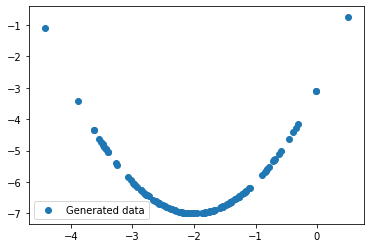

In [189]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x,y, label = 'Generated data')
plt.legend()
plt.show()

In [190]:
# Data shapes

print('x:', tuple(x.shape))
print('y:',tuple(y.shape))


x: (128, 1)
y: (128, 1)


In [191]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self, n_feature, n_output):
        super(Linear_0H, self).__init__()

        # TODO
        self.classifier = nn.Sequential(
             nn.Linear(n_feature, n_output),
             )
        
    def forward(self, x):
        return self.classifier(x)

In [192]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Linear_1H, self).__init__()

        # TODO
        self.classifier = nn.Sequential(
              nn.Linear(n_feature, n_hidden),
              nn.ReLU(),
              nn.Linear(n_hidden, n_output),
              )

    def forward(self, x):
        return self.classifier(x)

In [193]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Linear_2H, self).__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(n_feature, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden,n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, n_output), 
            )

    def forward(self, x):
        return self.classifier(x)

In [194]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # Define MSE loss function
    criterion = torch.nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y_pred, y)


        # TODO: Zero gradient
        optimizer.zero_grad()
        
        # TODO: call backward on loss
        loss.backward()
        
        # TODO: step the optimizer
        optimizer.step()
        
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

Epoch 100 loss: 3.3711135387420654
Epoch 200 loss: 2.377268075942993
Epoch 300 loss: 1.8444777727127075
Epoch 400 loss: 1.5588537454605103
Epoch 500 loss: 1.4057323932647705
Epoch 600 loss: 1.3236454725265503
Epoch 700 loss: 1.2796398401260376
Epoch 800 loss: 1.2560487985610962
Epoch 900 loss: 1.2434018850326538
Epoch 1000 loss: 1.2366219758987427


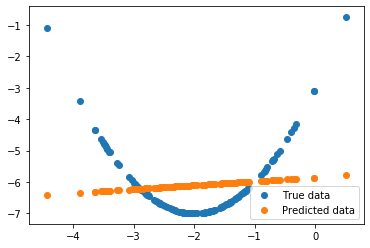

In [195]:
# 0H model on quadratic data
model = Linear_0H(n_feature = 1, n_output = 1)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x, y, label = 'True data')
plt.scatter(x, y_pred, label = 'Predicted data')
plt.legend()
plt.show()

Epoch 100 loss: 1.8421376943588257
Epoch 200 loss: 0.8967394828796387
Epoch 300 loss: 0.6937336921691895
Epoch 400 loss: 0.5439189076423645
Epoch 500 loss: 0.4211842119693756
Epoch 600 loss: 0.3246660828590393
Epoch 700 loss: 0.2539371848106384
Epoch 800 loss: 0.20531226694583893
Epoch 900 loss: 0.1738778054714203
Epoch 1000 loss: 0.15422357618808746


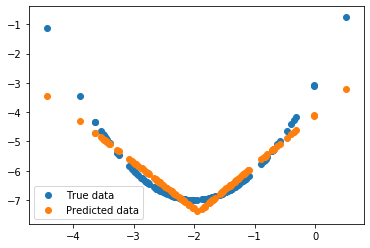

In [196]:
# 1H model on quadratic data
model = Linear_1H(n_feature = 1, n_hidden = 5, n_output = 1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y, label = 'True data')
plt.scatter(x, y_pred, label = 'Predicted data')
plt.legend()
plt.show()

Epoch 100 loss: 0.8756207227706909
Epoch 200 loss: 0.49807995557785034
Epoch 300 loss: 0.25652849674224854
Epoch 400 loss: 0.531870424747467
Epoch 500 loss: 0.3199211359024048
Epoch 600 loss: 0.18399274349212646
Epoch 700 loss: 0.10868291556835175
Epoch 800 loss: 0.07716342806816101
Epoch 900 loss: 0.052290529012680054
Epoch 1000 loss: 0.05097201466560364


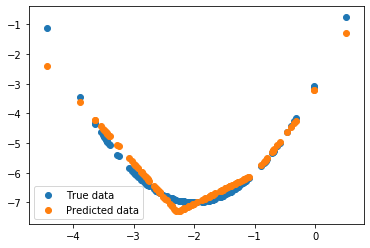

In [197]:
# 2H model on quadratic data
model = Linear_2H(n_feature = 1, n_hidden = 5, n_output = 1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y, label = 'True data')
plt.scatter(x, y_pred, label = 'Predicted data')
plt.legend()
plt.show()

In [198]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 11.475406646728516
Epoch 200 loss: 11.475061416625977
Epoch 300 loss: 11.474906921386719
Epoch 400 loss: 11.474836349487305
Epoch 500 loss: 11.47480583190918
Epoch 600 loss: 11.474791526794434
Epoch 700 loss: 11.474784851074219
Epoch 800 loss: 11.474782943725586
Epoch 900 loss: 11.474781036376953
Epoch 1000 loss: 11.474780082702637


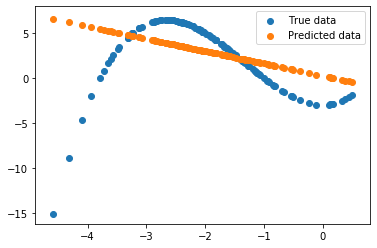

In [199]:
# 0H model on cubic data
model = Linear_0H(n_feature = 1, n_output = 1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y, label = 'True data')
plt.scatter(x, y_pred, label = 'Predicted data')
plt.legend()
plt.show()

Epoch 100 loss: 11.06525993347168
Epoch 200 loss: 10.081028938293457
Epoch 300 loss: 9.146366119384766
Epoch 400 loss: 8.296001434326172
Epoch 500 loss: 7.267083168029785
Epoch 600 loss: 5.93903112411499
Epoch 700 loss: 5.042837142944336
Epoch 800 loss: 4.616409778594971
Epoch 900 loss: 4.3060102462768555
Epoch 1000 loss: 4.031954288482666


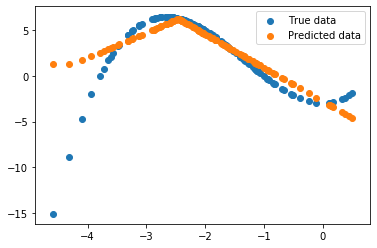

In [200]:
# 1H model on cubic data
model = Linear_1H(n_feature = 1, n_hidden = 5, n_output = 1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y, label = 'True data')
plt.scatter(x, y_pred, label = 'Predicted data')
plt.legend()
plt.show()

Epoch 100 loss: 11.346467971801758
Epoch 200 loss: 9.454874992370605
Epoch 300 loss: 8.894959449768066
Epoch 400 loss: 7.654540538787842
Epoch 500 loss: 5.536271095275879
Epoch 600 loss: 4.404497146606445
Epoch 700 loss: 3.487776756286621
Epoch 800 loss: 2.4551968574523926
Epoch 900 loss: 1.8326144218444824
Epoch 1000 loss: 1.3382710218429565


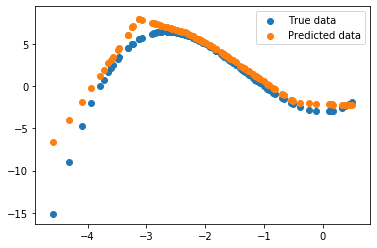

In [201]:
# 2H model on cubic data
model = Linear_2H(n_feature = 1, n_hidden = 5, n_output = 1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y, label = 'True data')
plt.scatter(x, y_pred, label = 'Predicted data')
plt.legend()
plt.show()